In [5]:
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [6]:
runs_root = Path('../runs')
for c in runs_root.iterdir():
    print(c.name)

dqn_dense_ms_ec_eps0_smallrandoms
reinforce_ms100x_smallrandoms
dqn_dense_ms_ec_eps0_mediumrandoms


In [7]:
experiment_name = "dqn_dense_ms_ec_eps0_mediumrandoms"
paths = list(sorted((runs_root / experiment_name).iterdir()))

In [8]:
import drlqap.experiment as exp

In [9]:
metadatas = [exp.load_metadata(path) for path in paths]

In [10]:
from drlqap.evaltools import load_float_txt
values = [load_float_txt(path / "value.txt") for path in paths]

In [11]:
metadata = [
    {
        'path': path,
        'seed': meta['seed'],
        **meta['agent_arguments'],
    }
    for path, meta in zip(paths, metadatas)
]
meta_df = pd.DataFrame(metadata)

In [12]:
meta_index = pd.MultiIndex.from_frame(meta_df)

In [58]:
df = pd.DataFrame(values, index = meta_index)

In [59]:
# Filter data manually here
#df = df.query('seed < 3 and learning_rate > 1e-5')

In [60]:
df.head()

,,,,,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
path,seed,learning_rate,gnn_depth,hidden_size,,,,,,,,,,,,,,,,,,,,,
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1,1,0.00001,2,32,62.841865,65.490401,68.707125,75.261609,63.292314,60.738216,54.910917,60.493837,60.892021,57.181462,...,57.610738,73.636183,58.511356,62.658604,70.670330,58.216936,59.546621,60.288765,56.687721,64.662555
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1_2,1,0.00001,2,64,60.356959,63.078010,66.283673,72.765786,64.585302,64.282793,59.403110,61.344454,63.112754,58.763897,...,60.221531,68.832918,59.357369,68.874979,69.478466,59.881630,58.392156,59.255112,57.148568,62.780570
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1_3,1,0.00001,3,32,54.686776,58.461986,63.025775,68.389831,62.294490,58.678956,48.563840,59.759038,61.178057,54.712605,...,58.646611,69.548056,56.015146,66.812284,67.316161,60.276051,58.512473,61.266946,59.431332,59.992208
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1_4,1,0.00001,3,64,58.385339,60.947965,63.547658,71.026318,61.822749,61.701449,55.487429,57.327797,61.547429,56.381626,...,61.841229,72.983782,60.837985,68.273690,71.157797,60.135977,60.187867,61.964549,60.300097,61.992169
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1_5,1,0.00001,4,32,55.460938,59.356697,64.829594,71.535649,63.504378,59.686943,50.264630,59.263085,60.502248,53.892105,...,58.116716,71.316431,55.270159,66.281966,68.484719,63.854575,59.444276,59.552176,57.791123,63.628054


In [61]:
def aggregate(df, key, window, agg):
        return df.groupby(key).aggregate(agg).transpose().rolling(window).mean()

def generate_variation_plot(df, key, window):
    mean = aggregate(df, key, window, 'mean')
    upper = aggregate(df, key, window, 'max')
    lower = aggregate(df, key, window, 'min')
    cmap = matplotlib.cm.get_cmap('tab10')
    count = len(mean.columns)
    for i, col in enumerate(mean.columns):
        color = cmap(i)
        plt.fill_between(mean[col].index, lower[col], upper[col], alpha=0.1, color=color)
        individuals = df[df.index.get_level_values(key) == col].transpose().rolling(window).mean()
        for i in individuals:
            plt.plot(individuals[i], alpha=0.15, linewidth=5, color=color)
        plt.plot(mean[col], label=col, color=color, linewidth=2)
    plt.legend()

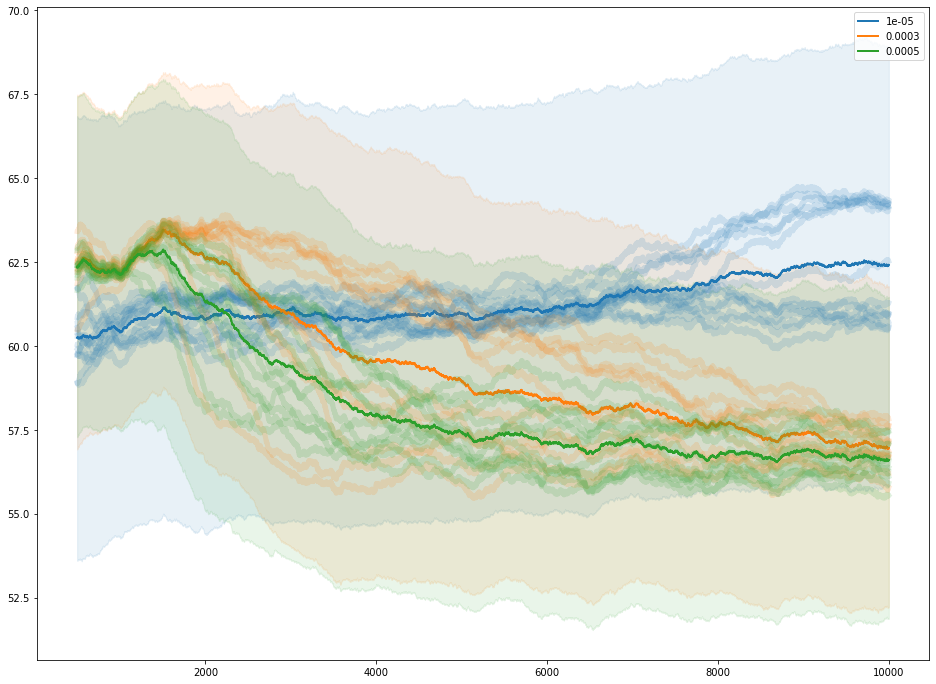

In [63]:
plt.figure(figsize=(16, 12))
generate_variation_plot(df, 'learning_rate', 500)